In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import *
import pandas as pd
import numpy as np
from qiskit.tools.monitor import job_monitor

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

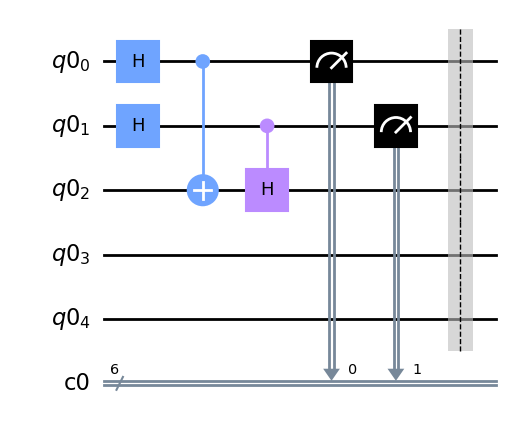

In [2]:
#Creando el circuito para Alice y Bob
qr = QuantumRegister(5)
cr = ClassicalRegister(6)
circuit = QuantumCircuit(qr, cr)
#Alice
circuit.h(qr[[0, 1]])
circuit.cx(0, 2)
circuit.ch(1, 2)
#Alice mide su propia base
circuit.measure(qr[[0, 1]], cr[[0, 1]])
circuit.barrier()
circuit.draw()

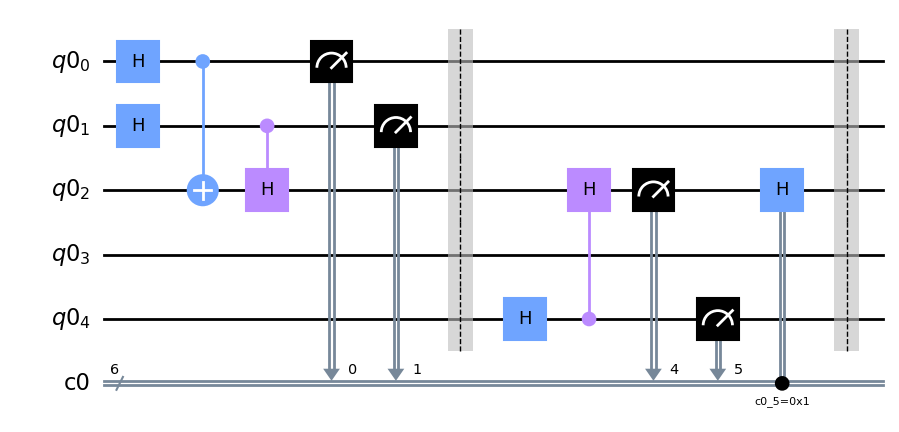

In [3]:
#Eve
circuit.h(qr[4])
circuit.ch(qr[4], qr[2])
circuit.measure(qr[[2, 4]], cr[[4, 5]])
circuit.h(qr[2]).c_if(cr[5], 1)
circuit.barrier()
circuit.draw()

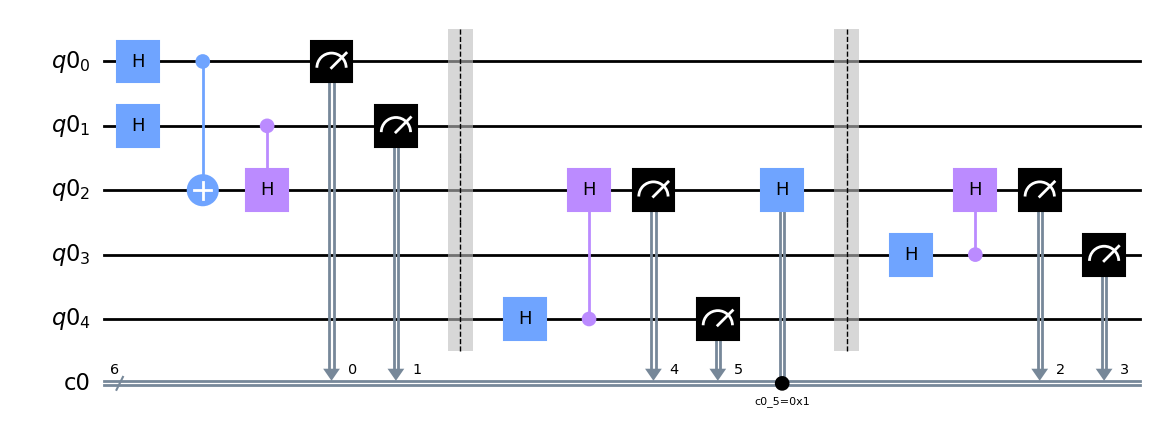

In [4]:
#Bob
circuit.h(qr[3])
circuit.ch(qr[3], qr[2])
circuit.measure(qr[[2, 3]], cr[[2, 3]])
circuit.draw()

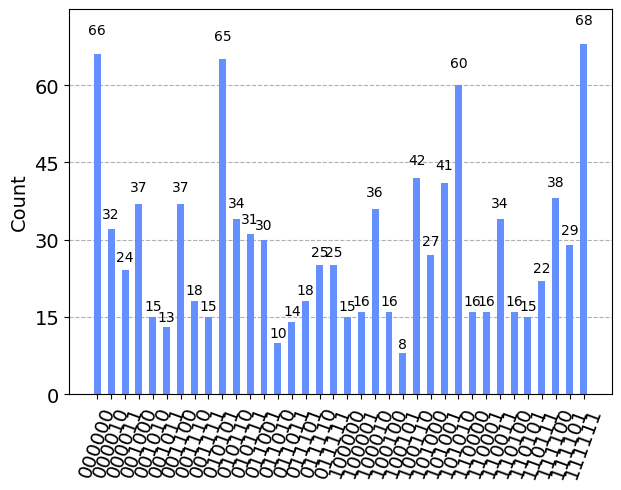

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
plot_histogram(result.get_counts(circuit))

In [7]:
A = result.get_counts(circuit)
A = pd.Series(A)
lis = A.index.values
err = 0
#Alice le comunica a Bob su base para q1
#Bob comprueba si la base que uso concuerda, esto es q1 == q3
#Esto asegura que lo que Alice mide para q0 sea lo mismo que lo que mide Bob en q2 (key) 
for i in lis:
    if list(i)[2] != list(i)[4]:
        A = A.drop(i)
lis = A.index.values
for i in lis:        
    if list(i)[3] != list(i)[5]:  
        err = A[i] + err
print('Error: ', (err / A.sum()) * 100)

Error:  26.171875


In [18]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-09-12 00:21:46,282: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibm_lagos')
job = execute(circuit, backend = qcomp)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))

Job Status: job incurred error
Traceback (most recent call last):
  Cell In[28], line 5
    result = job.result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:285 in result
    error_message = self.error_message()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:525 in error_message
    self._retrieve_result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:952 in _retrieve_result
    self._set_result(result_response)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:985 in _set_result
    raise IBMQJobApiError(
IBMQJobApiError: "Unable to retrieve result for job cjvrbrgcal0hh8mfkujg: 'results'"

Use %tb to get the full traceback.


In [20]:
A = result.get_counts(circuit)
A = pd.Series(A)
lis = A.index.values
err = 0
#Alice le comunica a Bob su base para q1
#Bob comprueba si la base que uso concuerda, esto es q1 == q3
#Esto asegura que lo que Alice mide para q0 sea lo mismo que lo que mide Bob en q2 (key) 
for i in lis:
    if list(i)[2] != list(i)[4]:
        A = A.drop(i)
lis = A.index.values
for i in lis:        
    if list(i)[3] != list(i)[5]:  
        err = A[i] + err
print('Error: ', (err / A.sum()) * 100)

Error:  48.324742268041234
